## https://www.kaggle.com/jakub97
## https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Wczytanie zestawu uczącego

In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train = pd.read_csv('projekt/train.csv', index_col=0)
price = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True)

## Sprawdzenie typu dostępnych danych

In [2]:
for var in train.columns:
    print(var, train[var].dtype.type)

MSSubClass <class 'numpy.int64'>
MSZoning <class 'numpy.object_'>
LotFrontage <class 'numpy.float64'>
LotArea <class 'numpy.int64'>
Street <class 'numpy.object_'>
Alley <class 'numpy.object_'>
LotShape <class 'numpy.object_'>
LandContour <class 'numpy.object_'>
Utilities <class 'numpy.object_'>
LotConfig <class 'numpy.object_'>
LandSlope <class 'numpy.object_'>
Neighborhood <class 'numpy.object_'>
Condition1 <class 'numpy.object_'>
Condition2 <class 'numpy.object_'>
BldgType <class 'numpy.object_'>
HouseStyle <class 'numpy.object_'>
OverallQual <class 'numpy.int64'>
OverallCond <class 'numpy.int64'>
YearBuilt <class 'numpy.int64'>
YearRemodAdd <class 'numpy.int64'>
RoofStyle <class 'numpy.object_'>
RoofMatl <class 'numpy.object_'>
Exterior1st <class 'numpy.object_'>
Exterior2nd <class 'numpy.object_'>
MasVnrType <class 'numpy.object_'>
MasVnrArea <class 'numpy.float64'>
ExterQual <class 'numpy.object_'>
ExterCond <class 'numpy.object_'>
Foundation <class 'numpy.object_'>
BsmtQual <clas

## Sprawdzenie rozkładu pól liczbowych względem ceny budynku

C:\Users\Michal\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


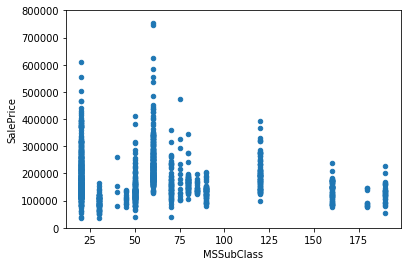

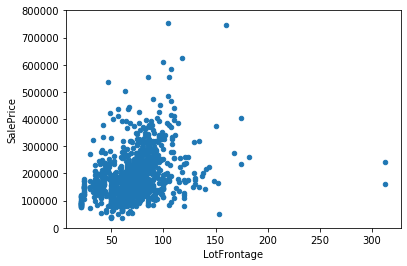

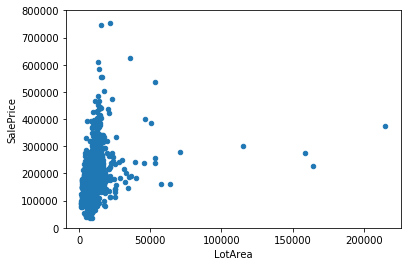

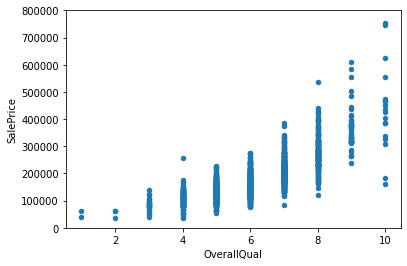

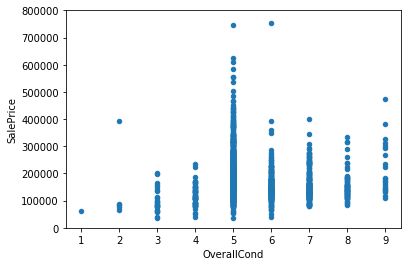

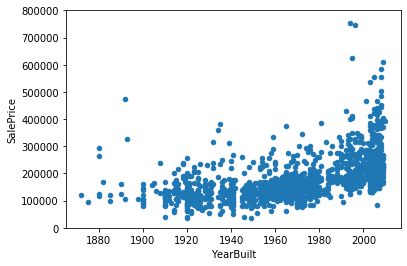

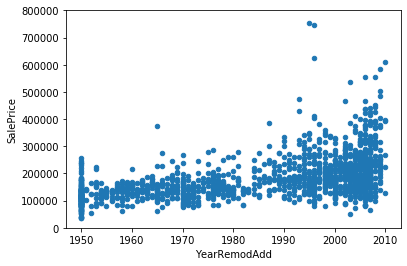

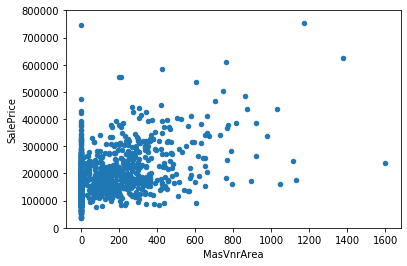

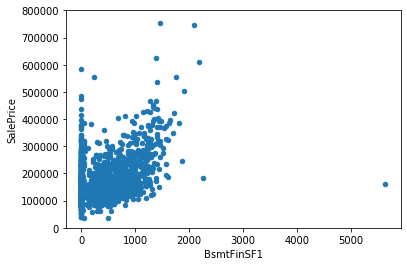

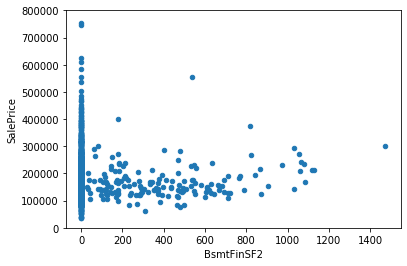

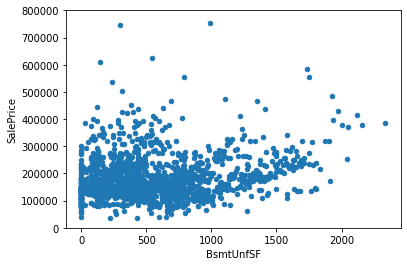

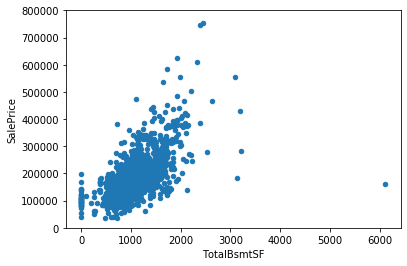

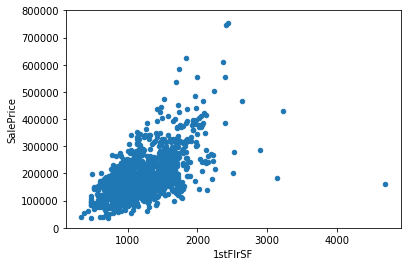

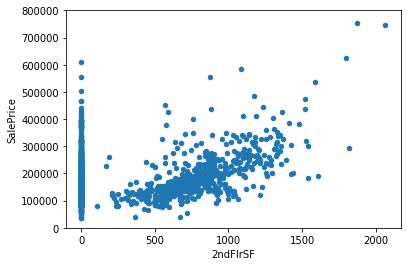

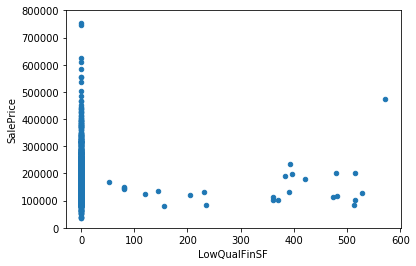

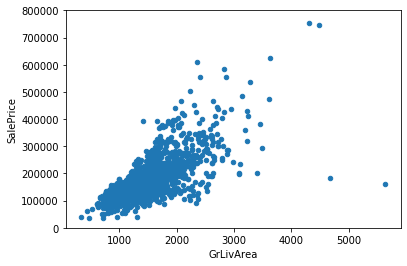

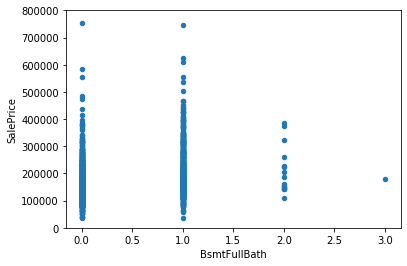

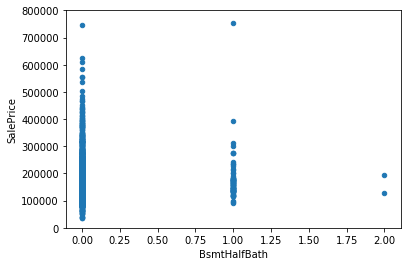

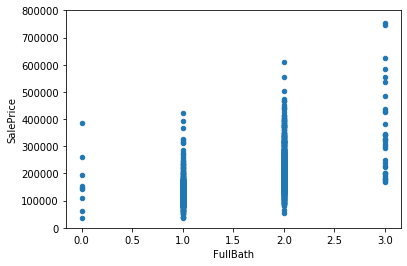

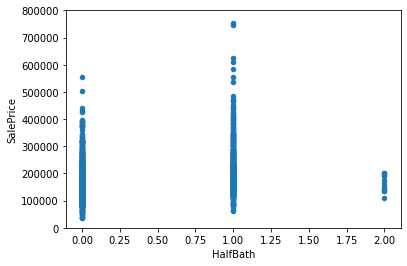

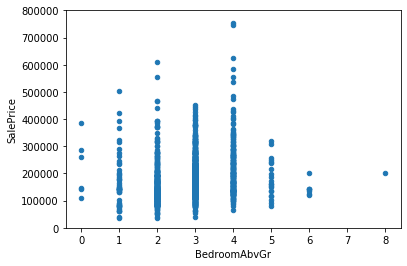

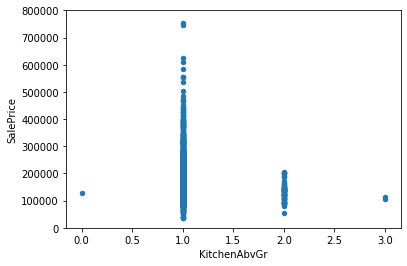

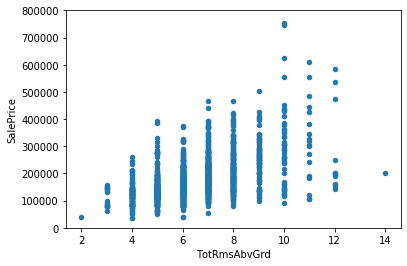

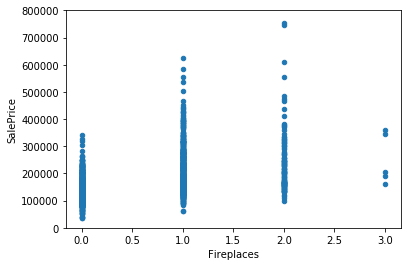

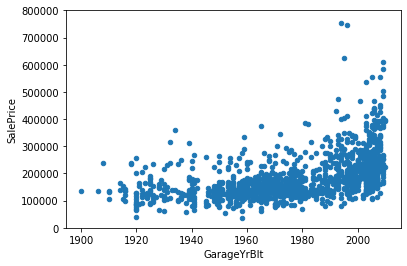

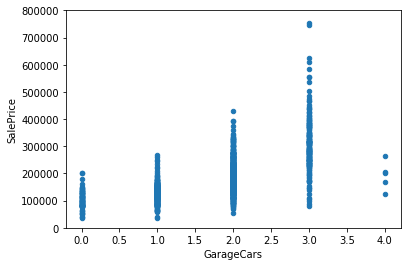

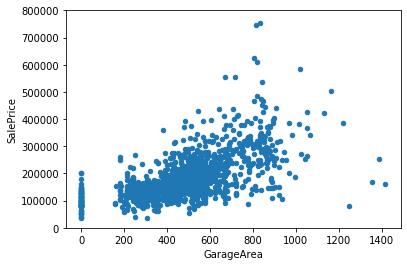

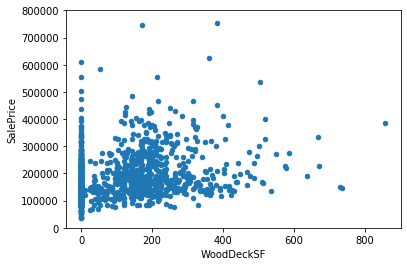

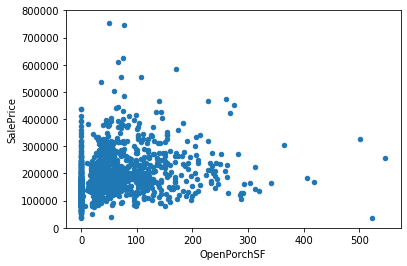

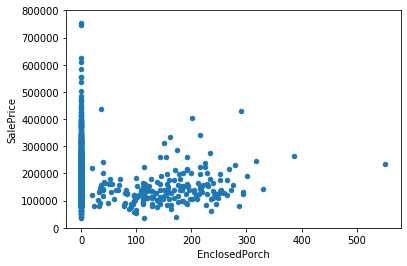

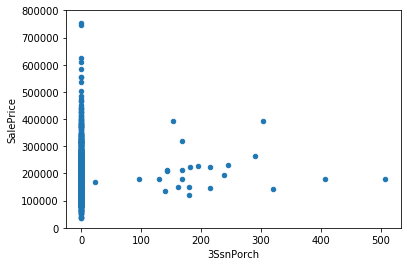

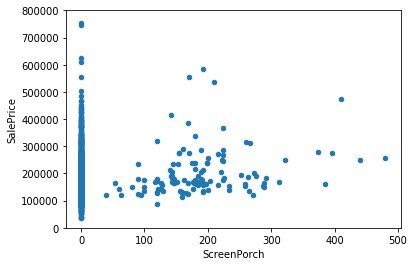

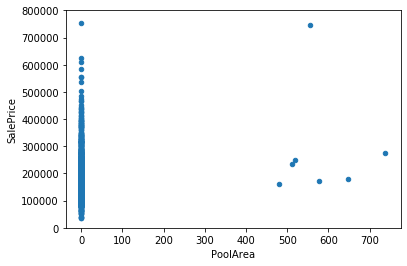

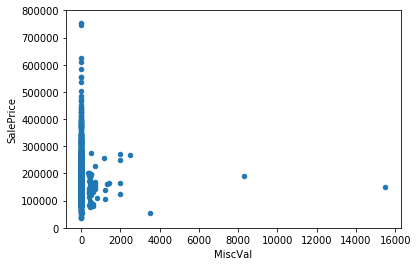

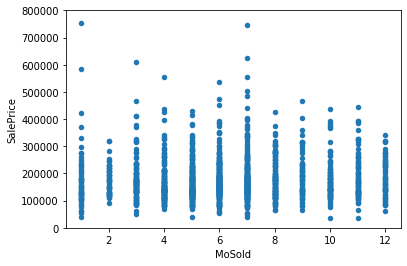

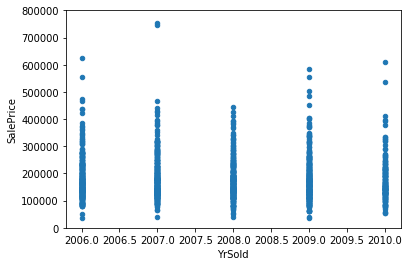

In [3]:
for var in train.columns:
    if train[var].dtype.type is np.object_:
        continue
    t = pd.concat([price, train[var]], axis=1)
    t.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

## Wybór do dalszej pracy zmiennych które wykazują korelację z ceną budynku
### Wyświetlenie ilości brakujących danych

In [4]:
numeric_variables = ['LotFrontage', 'LotArea', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
train = train[numeric_variables]
total = train.isnull().sum()
print(total)

LotFrontage    259
LotArea          0
OverallQual      0
TotalBsmtSF      0
GrLivArea        0
GarageArea       0
dtype: int64


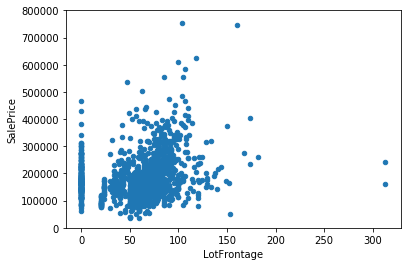

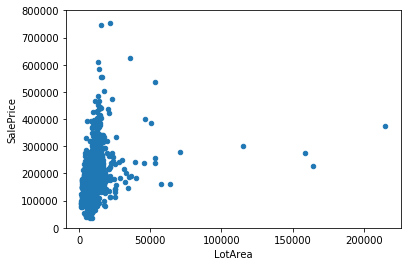

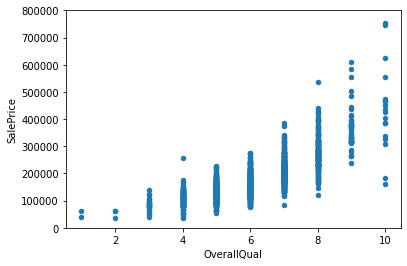

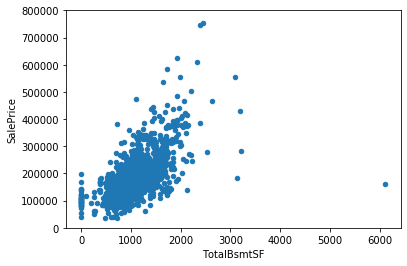

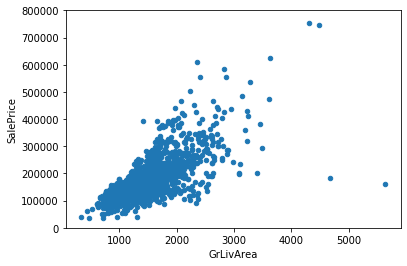

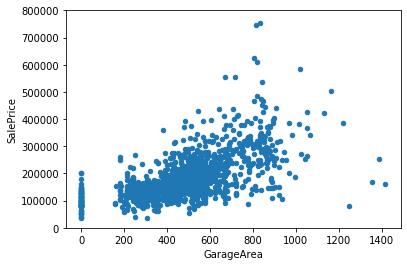

In [5]:
for var in train.columns:
    train[var].fillna(0, inplace=True)
    t = pd.concat([price, train[var]], axis=1)
    t.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

## Najlepsze wyniki uzyskaliśmy dla ExtraTreesRegressor
### Przy n_estimators=5000 sieć 'overfituje'/uczy się na pamięć i uzyskujemy gorsze rezultaty

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor(n_estimators=500)

from sklearn.svm import SVC
#model=SVC(gamma='auto')

from sklearn.tree import DecisionTreeRegressor
#model=DecisionTreeRegressor()

from sklearn.naive_bayes import GaussianNB
#model=GaussianNB()

from sklearn.naive_bayes import MultinomialNB
#model=MultinomialNB()

from sklearn.naive_bayes import ComplementNB #TODO
#model=ComplementNB()

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic
#model=GaussianProcessRegressor(alpha=1e-6, n_restarts_optimizer=5, kernel=RationalQuadratic())

from sklearn.neural_network import MLPRegressor
#model=MLPRegressor(max_iter=1000000)

from sklearn.ensemble import AdaBoostRegressor
#model=AdaBoostRegressor()

print (model)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)


## Skalowanie nieznacznie poprawiło nasz wynik

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(train)

# training the model...
model.fit(train,price)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

## Zastąpienie brakujących pól wartością 0

In [8]:
test = pd.read_csv('projekt/test.csv')
testId = test['Id']
test = test[numeric_variables]
total = test.isnull().sum()
print(total)
for var in train.columns:
    test[var].fillna(0, inplace=True)

LotFrontage    227
LotArea          0
OverallQual      0
TotalBsmtSF      1
GrLivArea        0
GarageArea       1
dtype: int64


## Utworzenie pliku do oceny na kaggle.com

In [9]:
scaler.transform(test)
y_pred = model.predict(test)
Submission = pd.DataFrame({ 'Id': testId,
                            'SalePrice': y_pred })
Submission.to_csv("projekt/Submission.csv", index=False)
Submission.head()

,Id,SalePrice
0,1461,140651.600
1,1462,152609.652
2,1463,148475.242
3,1464,176453.700
4,1465,207300.440
